Epoch count 0: Accuracy: 100.00%
Epoch count 1: Accuracy: 21.00%
Epoch count 2: Accuracy: 31.00%
Epoch count 3: Accuracy: 24.00%
Epoch count 4: Accuracy: 38.00%
Epoch count 5: Accuracy: 39.00%
Epoch count 6: Accuracy: 32.00%
Epoch count 7: Accuracy: 25.00%
Epoch count 8: Accuracy: 20.00%
Epoch count 9: Accuracy: 25.00%
Epoch count 10: Accuracy: 25.00%
Epoch count 11: Accuracy: 38.00%
Epoch count 12: Accuracy: 30.00%
Epoch count 13: Accuracy: 35.00%
Epoch count 14: Accuracy: 25.00%
Epoch count 15: Accuracy: 27.00%
Epoch count 16: Accuracy: 19.00%
Epoch count 17: Accuracy: 18.00%
Epoch count 18: Accuracy: 16.00%
Epoch count 19: Accuracy: 42.00%
Epoch count 20: Accuracy: 28.00%
Epoch count 21: Accuracy: 61.00%
Epoch count 22: Accuracy: 78.00%
Epoch count 23: Accuracy: 69.00%
Epoch count 24: Accuracy: 21.00%
Epoch count 25: Accuracy: 35.00%
Epoch count 26: Accuracy: 32.00%
Epoch count 27: Accuracy: 26.00%
Epoch count 28: Accuracy: 50.00%
Epoch count 29: Accuracy: 30.00%
Epoch count 30: Acc

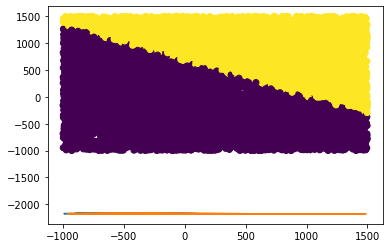

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import generator

batch_size = 100
gen = generator.gen(batch_size)
epochs = 100
x1, x2, yp = [], [], []  # for plotting

class perceptron:
    def __call__(self, x):  # predicting function
        return tf.math.sign(tf.tensordot(x, self.Weight, 1) + self.Bias)

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def loss(self, y, pred):
        signs = tf.math.sign(y*pred)
        negCount = tf.where(signs <= 0)
        return negCount.shape[0]/signs.shape[0]*100

    def train(self, x, y):
        global x1, x2, yp
        for i in range(len(x)):
            x1 += [x[i].numpy()[0]]
            x2 += [x[i].numpy()[1]]
            yp += [y[i]]
            if (y[i] * self(x[i])) <= 0:
                self.Weight.assign_add(x[i] * y[i])
                self.Bias.assign_add(y[i])

model = perceptron()
sampleX, sampleY = next(gen)
model.Weight.assign([0.0] * sampleX.shape[-1])
for epoch_count in range(epochs):
    x, y = next(gen)
    accuracy = model.loss(y, model(x))
    model.train(x, y)
    print(f"Epoch count {epoch_count}: Accuracy: {accuracy:.2f}%")

print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot(x, -1/model.Weight.numpy() * x + model.Bias.numpy())
plt.scatter(x1, x2, c=yp)
plt.show()

In [ ]:

import generator
import numpy as np
import tensorflow as tf

batch_size = 1
gen = generator.gen(batch_size)
epochs = 500
regTerm = 0.001
classNum = 2
lr = 1e-5

class LinearClassifier:
    def __call__(self, x):  # predicting function
        return tf.math.sign(x * self.Weight + self.Bias)

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=None)  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def loss(self, y, pred):
        signs = []
        sign = tf.math.sign(y*pred)
        if sign != 1:
            signs += [sign]
        return tf.reduce_mean(signs)

    def train(self, x, y, lr):
        sampleX, sampleY = next(gen)
        self.Weight.assign([0.0] * sampleX.shape[-1])
        with tf.GradientTape(persistent=False) as t:  # persistent=True is needed if assigning dy_dWeight, dy_dBias in 2 lines. Limits the times u can call it to once
            current_loss = self.loss(y, self(x))
        dy_dWeight, dy_dBias = t.gradient(current_loss, [self.Weight, self.Bias])
        self.Weight.assign_add(lr * dy_dWeight)
        self.Bias.assign_add(lr * dy_dBias)

model = LinearClassifier()
for epoch_count in range(epochs):
    x, y = next(gen)
    real_loss = model.loss(y, model(x))
    model.train(x, y, lr=lr)
    print(f"Epoch count {epoch_count}: Loss: {real_loss.numpy()}")

print(f'Weight: {LinearClassifier.Weight.numpy()}, Bias: {LinearClassifier.Bias.numpy()}')
